# ORCA Input Generation for O···O Distance Scan in Water Dimer

This script generates ORCA input files for Density Functional Theory (DFT) calculations
to study the non-bonded interaction between two water molecules.

Key:
- The scan varies the O···O distance from 2.00 Å to 5.00 Å in 0.01 Å steps.
- The first water molecule is kept fixed.
- The second water molecule is translated along the O···O vector.
- The hydrogen atoms attached to the moving O are shifted accordingly.
- ORCA input files are saved in the "O_scan_inputs" folder.
- All files are zipped into "O_scan_inputs.zip" for download.

This setup allows for calculating the interaction energy profile between two water
molecules as a function of O···O distance using ORCA.


In [4]:
import os
import numpy as np
import zipfile

folder_name = "O_scan_inputs"
os.makedirs(folder_name, exist_ok=True)

header = """! B3LYP D4 def2-TZVP VeryTightSCF

%pal
   nprocs 8
end

%maxcore 9000

%geom
   MaxIter 600
end

"""

atoms_fixed = [
"O       -3.590911000      3.401148000      0.030431000",
"H       -3.400145000      2.457871000     -0.097306000",
"H       -4.003159000      3.691935000     -0.788505000",
]

O1 = np.array([-3.590911000, 3.401148000, 0.030431000])  # fixed O
O2_original = np.array([-2.924634000, 0.582336000, -0.124907000])  # moving O
H1_original = np.array([-1.979662000, 0.486433000, 0.038299000])   # H of moving O
H2_original = np.array([-3.362805000, 0.126439000, 0.602477000])   # H of moving O

unit_vector = (O2_original - O1) / np.linalg.norm(O2_original - O1)
distances = [round(d, 3) for d in np.arange(2.000, 5.001, 0.01)]

for d in distances:
    new_O2 = O1 + d * unit_vector
    shift = new_O2 - O2_original
    new_H1 = H1_original + shift
    new_H2 = H2_original + shift

    filename = os.path.join(folder_name, f"O_scan_{d:.3f}.inp")
    with open(filename, 'w') as f:
        f.write(header)
        f.write("* xyz 0 1\n")
        for atom in atoms_fixed:
            f.write(atom + "\n")
        f.write(f"O       {new_O2[0]:.9f}   {new_O2[1]:.9f}   {new_O2[2]:.9f}\n")
        f.write(f"H       {new_H1[0]:.9f}   {new_H1[1]:.9f}   {new_H1[2]:.9f}\n")
        f.write(f"H       {new_H2[0]:.9f}   {new_H2[1]:.9f}   {new_H2[2]:.9f}\n")
        f.write("*\n")

zip_filename = "O_scan_inputs.zip"
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    for file in os.listdir(folder_name):
        zipf.write(os.path.join(folder_name, file), arcname=file)

print(f"{len(distances)} corrected dimer scan input files generated and zipped.")


301 corrected dimer scan input files generated and zipped.


# Download the Generated Input Files

This command allows me to download the ZIP file containing all the generated ORCA
input files (`O_scan_inputs.zip`) directly to my local machine.

In [5]:
from google.colab import files
files.download("O_scan_inputs.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Upload ORCA Output Files for Analysis

This cell lets us upload multiple `.out` files generated by ORCA for each O···O
distance scan point. These files will be used in the following steps to extract
interaction energies.


In [6]:

uploaded = files.upload()
output_files = [f for f in uploaded.keys() if f.endswith('.out')]

print(f"Uploaded {len(output_files)} ORCA output files.")

Saving O_scan_5.001.out to O_scan_5.001.out
Saving O_scan_4.999.out to O_scan_4.999.out
Saving O_scan_4.998.out to O_scan_4.998.out
Saving O_scan_4.997.out to O_scan_4.997.out
Saving O_scan_4.995.out to O_scan_4.995.out
Saving O_scan_4.993.out to O_scan_4.993.out
Saving O_scan_4.992.out to O_scan_4.992.out
Saving O_scan_4.991.out to O_scan_4.991.out
Saving O_scan_4.990.out to O_scan_4.990.out
Saving O_scan_4.988.out to O_scan_4.988.out
Saving O_scan_4.986.out to O_scan_4.986.out
Saving O_scan_4.985.out to O_scan_4.985.out
Saving O_scan_4.984.out to O_scan_4.984.out
Saving O_scan_4.983.out to O_scan_4.983.out
Saving O_scan_4.981.out to O_scan_4.981.out
Saving O_scan_4.980.out to O_scan_4.980.out
Saving O_scan_4.979.out to O_scan_4.979.out
Saving O_scan_4.977.out to O_scan_4.977.out
Saving O_scan_4.976.out to O_scan_4.976.out
Saving O_scan_4.968.out to O_scan_4.968.out
Saving O_scan_4.967.out to O_scan_4.967.out
Saving O_scan_4.966.out to O_scan_4.966.out
Saving O_scan_4.965.out to O_sca

# Extract and Display O···O Interaction Energies from ORCA Output

This section performs the following steps:

1. Extracts the O···O distance from each `.out` file.
2. Searches each output file for the line containing the "FINAL SINGLE POINT ENERGY".
3. Sorts the files by O···O distance to ensure the energy profile is in order.
4. Prints a table showing the O···O distance (in Ångströms) and corresponding total energy (in Hartree).

In [27]:
import re

def extract_o_o_distance(filename):
    match = re.search(r"O_scan_(\d+\.\d+)", filename)
    return float(match.group(1)) if match else None

energy_pattern = re.compile(r"FINAL SINGLE POINT ENERGY\s+(-?\d+\.\d+)")

output_files = [f for f in os.listdir() if f.endswith(".out")]
output_files = [f for f in output_files if extract_o_o_distance(f) is not None]
output_files = sorted(output_files, key=extract_o_o_distance)

print(f"{'O–O Distance (Å)':>17}   {'Energy (Eh)':>15}")
print("-" * 35)
distances = []
energies = []
for file in output_files:
    o_o_distance = extract_o_o_distance(file)
    with open(file, 'r') as f:
        content = f.read()
        match = energy_pattern.search(content)
        if match:
            energy = float(match.group(1))
            distances.append(o_o_distance)
            energies.append(energy)
            print(f"{o_o_distance:17.3f}   {energy:15.8f}")
        else:
            print(f"{o_o_distance:17.3f}   {'Energy not found':>15}")


 O–O Distance (Å)       Energy (Eh)
-----------------------------------
            2.001     -152.76802423
            2.002     -152.76845514
            2.004     -152.76931138
            2.005     -152.76973672
            2.008     -152.77100173
            2.009     -152.77141975
            2.010     -152.77183597
            2.012     -152.77266301
            2.014     -152.77348292
            2.018     -152.77510159
            2.019     -152.77550189
            2.020     -152.77590048
            2.022     -152.77669248
            2.024     -152.77747766
            2.026     -152.77825608
            2.027     -152.77864277
            2.028     -152.77902779
            2.030     -152.77979287
            2.031     -152.78017293
            2.034     -152.78130333
            2.036     -152.78204883
            2.038     -152.78278792
            2.039     -152.78315508
            2.040     -152.78352066
            2.042     -152.78424710
            2.043     -152.7

# Export O···O Energy Data to CSV

This saves the O···O distances and corresponding energies to a CSV file
(`o_o_energy_data.csv`) and downloads it for external analysis or backup.


In [30]:
import csv

filename = "o_o_energy_data.csv"

with open(filename, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["O–O Distance (Å)", "Energy (Eh)"])
    for d, e in zip(distances, energies):
        writer.writerow([f"{d:.3f}", f"{e:.8f}"])
from google.colab import files; files.download("o_o_energy_data.csv")

# Plot O···O Interaction Energy Profile

This plot shows how the interaction energy between two water molecules changes
with O···O distance:

- The energy curve is relative to the minimum (equilibrium).
- The equilibrium point is marked and annotated.
- Regions of repulsion, equilibrium, and attraction are shaded.


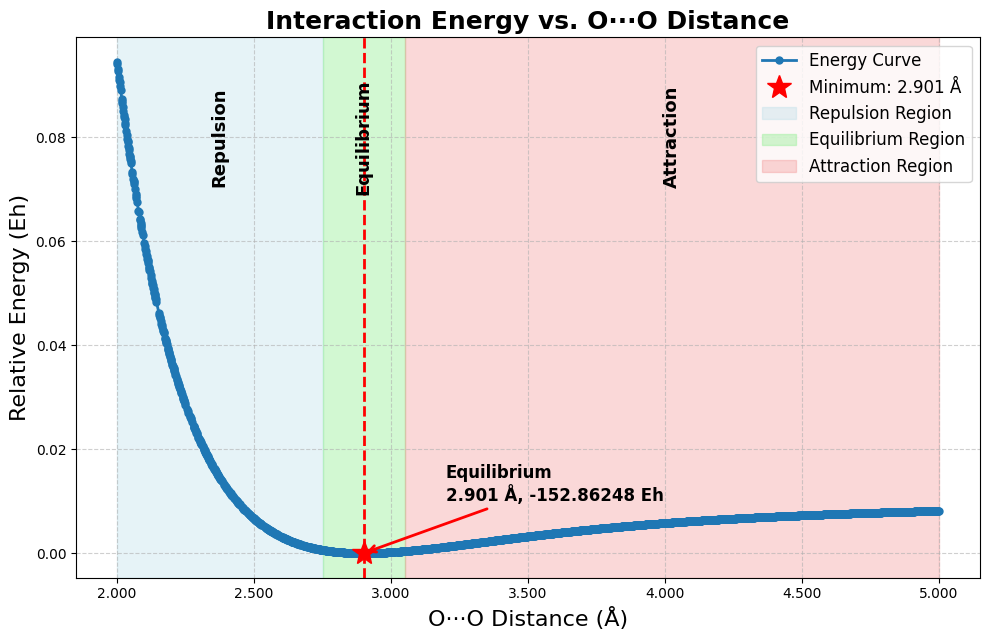

In [28]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter


min_E = min(energies)
min_index = energies.index(min_E)
min_distance = distances[min_index]
left_boundary = min_distance - 0.15
right_boundary = min_distance + 0.15

plt.figure(figsize=(10, 6.5))

plt.plot(distances, [e - min_E for e in energies], marker='o', linestyle='-', linewidth=2.0, markersize=5,
         label="Energy Curve", color="#1f77b4")

plt.plot(min_distance, 0, 'r*', markersize=18, label=f"Minimum: {min_distance:.3f} Å")

plt.annotate(f"Equilibrium\n{min_distance:.3f} Å, {min_E:.5f} Eh",
             xy=(min_distance, 0),
             xytext=(min_distance + 0.3, 0.01),
             ha='left',
             arrowprops=dict(arrowstyle='->', color='red', lw=2),
             fontsize=12,
             fontweight='bold',
             color='black')

plt.axvspan(distances[0], left_boundary, color='lightblue', alpha=0.3, label="Repulsion Region")
plt.axvspan(left_boundary, right_boundary, color='lightgreen', alpha=0.4, label="Equilibrium Region")
plt.axvspan(right_boundary, distances[-1], color='lightcoral', alpha=0.3, label="Attraction Region")

plt.axvline(min_distance, color='red', linestyle='--', linewidth=2)

plt.text((distances[0] + left_boundary) / 2, 0.08, "Repulsion", ha='center', va='center', fontsize=13, fontweight='bold', rotation=90)
plt.text((left_boundary + right_boundary) / 2, 0.08, "Equilibrium", ha='center', va='center', fontsize=13, fontweight='bold', rotation=90)
plt.text((right_boundary + distances[-1]) / 2, 0.08, "Attraction", ha='center', va='center', fontsize=13, fontweight='bold', rotation=90)

plt.title("Interaction Energy vs. O···O Distance", fontsize=18, fontweight='bold')
plt.xlabel("O···O Distance (Å)", fontsize=16)
plt.ylabel("Relative Energy (Eh)", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)

plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.3f'))

plt.legend(fontsize=12, loc='upper right', frameon=True)

plt.tight_layout()
plt.show()
